https://gist.github.com/jiahao/1561144




https://en.wikipedia.org/wiki/Gradient_descent



Note that the value of the step size ${\displaystyle \gamma } \gamma$  is allowed to change at every iteration. With certain assumptions on the function ${\displaystyle F} F$ (for example, ${\displaystyle F} F$ convex and ${\displaystyle \nabla F} \nabla F$ Lipschitz) and particular choices of ${\displaystyle \gamma } \gamma$  (e.g., chosen either via a line search that satisfies the Wolfe conditions or the Barzilai-Borwein method shown as following),


$${\displaystyle \gamma _{n}={\frac {(\mathbf {x} _{n}-\mathbf {x} _{n-1})^{T}[\nabla F(\mathbf {x} _{n})-\nabla F(\mathbf {x} _{n-1})]}{||\nabla F(\mathbf {x} _{n})-\nabla F(\mathbf {x} _{n-1})||^{2}}}}$$

convergence to a local minimum can be guaranteed. When the function {\displaystyle F} F is convex, all local minima are also global minima, so in this case gradient descent can converge to the global solution.


## Line search

https://en.wikipedia.org/wiki/Line_search

In optimization, the line search strategy is one of two basic iterative approaches to find a local minimum ${\displaystyle \mathbf {x} ^{*}} \mathbf{x}^*$ of an objective function ${\displaystyle f:\mathbb {R} ^{n}\to \mathbb {R} } f:\mathbb {R} ^{n}\to \mathbb {R}$ . 


Here is an example gradient method that uses a line search in step 4.

Set iteration counter ${\displaystyle \displaystyle k=0} \displaystyle k=0$, and make an initial guess ${\displaystyle \mathbf {x} _{0}} \mathbf {x} _{0}$ for the minimum

Repeat:

- Compute a descent direction ${\displaystyle \mathbf {p} _{k}} \mathbf {p} _{k}$

- Choose ${\displaystyle \displaystyle \alpha _{k}} \displaystyle \alpha _{k}$ to 'loosely' minimize ${\displaystyle h(\alpha )=f(\mathbf {x} _{k}+\alpha \mathbf {p} _{k})} h(\alpha )=f({\mathbf  {x}}_{k}+\alpha {\mathbf  {p}}_{k})$ over ${\displaystyle \alpha \in \mathbb {R} _{+}} \alpha \in {\mathbb  R}_{+}$

- Update ${\displaystyle \mathbf {x} _{k+1}=\mathbf {x} _{k}+\alpha _{k}\mathbf {p} _{k}} {\mathbf  {x}}_{{k+1}}={\mathbf  {x}}_{k}+\alpha _{k}{\mathbf  {p}}_{k}$, and ${\displaystyle \displaystyle k=k+1} \displaystyle k=k+1$

- Until ${\displaystyle \|\nabla f(\mathbf {x} _{k})\|} \|\nabla f({\mathbf  {x}}_{k})\| < tolerance$



### Optimization - Line Search Method

https://nlperic.github.io/line-search/

A simple unconstrained problem: how to find the minimum of $100(x_1^2-x_2)^2+(x_2-1)^2$?

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


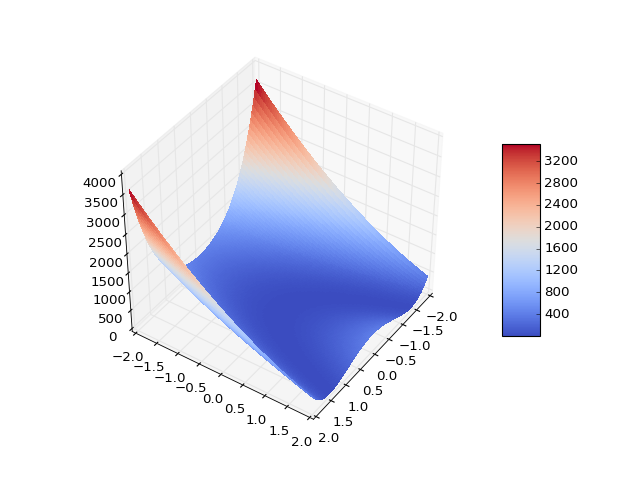

In [2]:
%pylab notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  #color map
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = 100*np.square(np.square(x)-y)+np.square(x-1)
fig = plt.figure()
ax = fig.gca(projection='3d') #gca get current ax
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=\
       0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.savefig('./res/surface.jpg')

There are two basic iterative methods for optimization problems: the line search method and the trust region method. The line search approach first finds a descent direction along which the objective function ff will be reduced and then computes the step size that determines how far xx should move along that direction.

The updating rule of line search method is $x_{k+1}=x_k+\alpha_k*d(x_k)$, we need to compute the direction $d(x_k)$ and step size $\alpha_k$ seperately.

- direction: gradient descent, Newton’s method, etc.

- step size: Golden-section method, Armijo rule, Wolfe rule, etc.


### Gradient descent method(梯度下降法)

The algorithm of gradient descent method reads:

1. Initialization: find a initial value of x0 in the feasible set

1. Convergence Test: calculate the gradient of current value $∇f(x)$, and know if it satisfy the convergent criteria.

1. Update: if not converge, update $xi+1=xi−r∇f(x$), where r is a small number to control the step size.

[ 0.9992  5.4   ] 1937.40769324 1
[ 1.17512328  5.31196801] 1545.34865878 2
[ 1.35986715  5.23334695] 1145.34839389 3
[ 1.54387268  5.16566478] 774.316036892 4
[ 1.71557359  5.11002234] 470.027098769 5
[ 1.8641247   5.06668575] 254.105512684 6
[ 1.98263882  5.03485125] 122.845979003 7
[ 2.06999519  5.01277136] 54.1274600339 8
[ 2.13005045  4.99821354] 22.538207813 9
[ 2.16911097  4.98899156] 9.42953273857 10
[ 2.19351384  4.98331258] 4.37632981463 11
[ 2.20834981  4.97987639] 2.52240056867 12
[ 2.2172125   4.97781504] 1.8633295344 13
[ 2.22244857  4.97657936] 1.63352235128 14
[ 2.22552013  4.97583333] 1.55431081198 15
[ 2.22731302  4.97537546] 1.52718377823 16


<IPython.core.display.Javascript object>


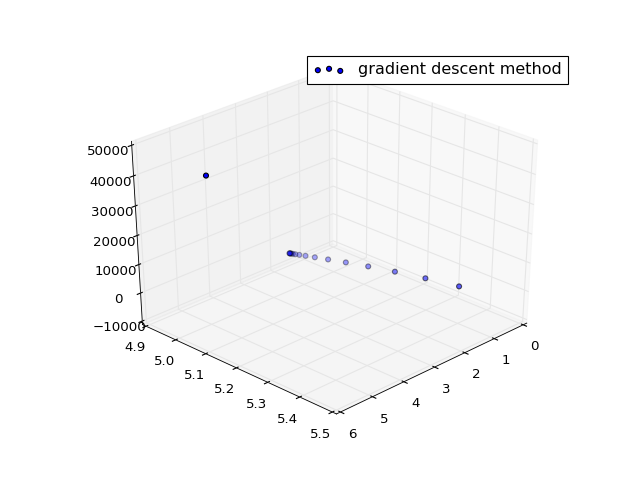

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x):
    return 100*np.square(np.square(x[0])-x[1])+np.square(x[0]-1)
    
# first order derivatives of the function
def dfunc(x):
    df1 = 400*x[0]*(np.square(x[0])-x[1])+2*(x[0]-1)
    df2 = -200*(np.square(x[0])-x[1])
    return np.array([df1, df2])
    
def grad(x, max_int):
    miter = 1
    step = .0001/miter
    vals = []
    objectfs = []
    # you can customize your own condition of convergence, here we limit the number of iterations
    while miter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x-step*dfunc(x)
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        print(x, func(x), miter)
        miter += 1
    return vals, objectfs, miter

start = [5, 5]
val, objectf, iters = grad(start, 50)

x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objectf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='gradient descent method')
ax.legend()
#plt.savefig('./res/g-d.jpg')

## Newton’s method(牛顿法)

Similar to the gradient method, the algorithm of Newton’s method for optimization reads:

1. Initialization: find a initial value of $x_0$ in the feasible set

1. Convergence Test: calculate the gradient and Hessian matrix of current value $∇f(x)$, and know if it satisfies the convergent criteria.

1. Update: if not converge, update$ x_{i+1}=x_i−rH^{−1} ∇f(x)x$, where $r$ is a small number to control the step size and $H$ is the Hessian matrix.

[  4.99950012  14.99500125] 10015.996501 1
[  4.99850075  19.98500862] 2515.98913193 2
[  4.9965035   22.46504264] 640.974315635 3
[  4.99251498  23.67518762] 172.19472181 4
[  4.98456188  24.22078475] 54.9482768274 5
[  4.96875194  24.37570969] 25.5345080055 6
[  4.93753006  24.22183522] 17.9806075779 7
[  4.87690338  23.70182702] 15.7086889973 8
[  4.7659566   22.66085333] 14.4685358957 9
[  4.60498788  21.153258  ] 13.2731967839 10
[  4.44867175  19.7399179 ] 12.1510193175 11
[  4.29405728  18.38964106] 11.0937327363 12
[  4.14236045  17.11149476] 10.1015324811 13
[  3.99316572  15.89928575] 9.17143984413 14
[  3.84669105  14.7525338 ] 8.30165891906 15
[  3.70291355  13.6686477 ] 7.48996348743 16
[  3.56190493  12.64582277] 6.73428922735 17
[  3.42370436  11.6819802 ] 6.03251910954 18
[  3.28836654  10.77515251] 5.38256083883 19
[ 3.1559441   9.92334647] 4.78231983084 20
[ 3.02649439  9.12459271] 4.22970916727 21
[ 2.90007737  8.37692968] 3.72264670684 22
[ 2.77675676  7.67841059] 3

<IPython.core.display.Javascript object>


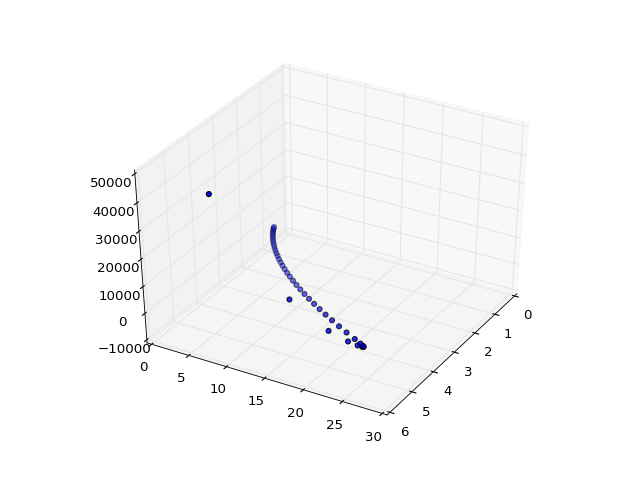

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv

def func(x):
    return 100*np.square(np.square(x[0])-x[1])+np.square(x[0]-1)

# first order derivatives of the function
def dfunc(x):
    df1 = 400*x[0]*(np.square(x[0])-x[1])+2*(x[0]-1)
    df2 = -200*(np.square(x[0])-x[1])
    return np.array([df1, df2])

def invhess(x):
    df11 = 1200*np.square(x[0])-400*x[1]+2
    df12 = -400*x[0]
    df21 = -400*x[0]
    df22 = 200
    hess = np.array([[df11, df12], [df21, df22]])
    return inv(hess)

def newton(x, max_int):
    miter = 1
    step = .5
    vals = []
    objectfs = []
    # you can customize your own condition of convergence, here we limit the number of iterations
    while miter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x-step*(invhess(x).dot(dfunc(x)))
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        print(x, func(x), miter)
        miter += 1
    return vals, objectfs, miter

start = [5, 5]
val, objectf, iters = newton(start, 50)

x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objectf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='newton method')
#plt.savefig('./res/newton.jpg')

In [5]:
import scipy as sp
import scipy.optimize
def test_func(x):
    return (x[0])**2+(x[1])**2

def test_grad(x):
    return [2*x[0],2*x[1]]

import numpy as np
sp.optimize.line_search(test_func,test_grad,np.array([1.8,1.7]),np.array([-1.,-1.]))

(1.0,
 2,
 1,
 1.1300000000000001,
 6.1299999999999999,
 [1.6000000000000001, 1.3999999999999999])

## conjugate gradient

https://en.wikipedia.org/wiki/Conjugate_gradient_method



The conjugate gradient method is often implemented as an iterative algorithm, applicable to sparse systems that are too large to be handled by a direct implementation or other direct methods such as the Cholesky decomposition.

We say that two non-zero vectors u and v are conjugate (with respect to A) if

${\displaystyle \mathbf {u} ^{\mathsf {T}}\mathbf {A} \mathbf {v} =0.} \mathbf {u} ^{\mathsf {T}}\mathbf {A} \mathbf {v} =0$
.
Since A is symmetric and positive definite, the left-hand side defines an inner product


In [ ]:
#!/usr/bin/env python

'''
Pure Python implementation of some numerical optimizers
Created on Jan 21, 2011
@author Jiahao Chen
'''

from scipy import dot, eye, finfo, asarray_chkfinite, sqrt, \
    outer, zeros, isinf, arccos
from scipy.linalg import inv, norm, pinv, solve, LinAlgError
from copy import deepcopy

_epsilon = sqrt(finfo(float).eps)

#################
# Line searches #
#################
def MinpackLineSearch(f, df, x, p, df_x = None, f_x = None,
                args = (), c1 = 1e-4, c2 = 0.4, amax = 50, xtol = _epsilon):
    "Modified shamelessly from scipy.optimize"

    if df_x == None: df_x = df(x)
    if f_x == None: f_x = f(x)
    from scipy.optimize import line_search
    stp, _, _, _, _, _ = line_search(f, df, x, p, df_x, f_x, f_x, args, c1, c2, amax)
    if stp == None: #Fall back to backtracking linesearch
        return BacktrackingLineSearch(f, df, x, p, df_x, f_x, args)
    else:
        return stp



def MoreThuenteLinesearchIterate(delta, alpha_l, alpha_u, alpha_t, alpha_min,
            alpha_max, f_l, g_l, f_t, g_t, f_u, g_u, isBracketed, Verbose):
    #Section 4 of More and Thuente: Pick new trial alpha
    if Verbose: print 'Section 4 of More and Thuente'
    assert not (isBracketed and not min(alpha_l, alpha_u) < alpha_t < max(alpha_l, alpha_u)), 'Bracketing fail'
    #if g_t * (alpha_t - alpha_l) < 0.0:
    #    if Verbose: print 'Going uphill; reverting to last good point'
    #    return isBracketed, alpha_l, alpha_l, alpha_t

    if alpha_min == alpha_max:
        print 'Squeezed!'
        return isBracketed, alpha_min, alpha_min, alpha_min

    assert alpha_min < alpha_max

    sgnd = dot(g_t, g_l / abs(g_l))
    isBounded = False
    if f_t > f_l:
        if Verbose:
            print """Case 1: a higher function value. \
The minimum is bracketed by [a_l, a_t]. If the cubic step is closer to \
lower bound then take it, else take average of quadratic and cubic steps."""
        #Calculate cubic and quadratic steps
        da = alpha_t - alpha_l
        d1 = g_l + g_t + 3 * (f_l - f_t) / da
        s = max(g_l, g_t, d1)
        d2 = s * ((d1 / s) ** 2 - (g_l / s * g_t / s)) ** 0.5
        if alpha_t < alpha_l:
            d2 = -d2
        cubp = d2 - g_l + d1
        cubq = ((d2 - g_l) + d2) + g_t
        if abs(cubq) > _epsilon:
            r = cubp / cubq
            #Minimizer of cubic that interpolates f_l, f_t, g_l, g_t
            alpha_c = alpha_l + r * da
            #Minimizer of quadratic that interpolates f_l, f_t, g_l
            alpha_q = alpha_l + ((g_l / ((f_l - f_t) / da + g_l)) * 0.5 * da)
        else:
            #print 'WARNING: VERY SMALL INTERVAL'
            alpha_c = alpha_q = 0.5 * (alpha_l + alpha_t) #Invalid, choose midpoint
        #Calculate new trial
        if Verbose:
            print 'Interpolating guesses:', alpha_c, alpha_q
        if abs(alpha_c - alpha_l) < abs(alpha_q - alpha_l):
            alpha_tt = alpha_c
        else:
            alpha_tt = 0.5 * (alpha_c + alpha_q)
        isBracketed = True
        isBounded = True

    elif sgnd < 0: #f_t <= f_l assumed by here
        if Verbose:
            print """Case 2: lower function value and derivatives are of opposite sign. \
The minimum is bracketed by [a_l, a_t]. If the cubic step is closer to lower \
bound then take it, else take quadratic step."""
        #Calculate cubic and quadratic steps
        da = alpha_t - alpha_l
        d1 = g_l + g_t + 3 * (f_l - f_t) / da
        s = max(g_l, g_t, d1)
        d2 = s * ((d1 / s) ** 2 - (g_l / s * g_t / s)) ** 0.5
        if alpha_t < alpha_l:
            d2 = -d2
        cubp = d2 - g_t + d1
        cubq = ((d2 - g_t) + d2) + g_l
        if abs(cubq) > _epsilon:
            r = cubp / cubq #Minimizer of cubic that interpolates f_l, f_t, g_l, g_t
            alpha_c = alpha_t - r * da #Minimizer of quadratic that interpolates f_l, f_t, g_l
            alpha_s = alpha_t - (g_l / (g_l - g_t)) * da
        else:
            #print 'WARNING: VERY SMALL INTERVAL'
            alpha_s = alpha_c = 0.5 * (alpha_l + alpha_t) #Invalid, choose midpoint
        #Calculate new trial
        if Verbose:
            print 'Interpolating guesses:', alpha_c, alpha_s
        if abs(alpha_c - alpha_t) >= abs(alpha_s - alpha_t):
            alpha_tt = alpha_c
        else:
            alpha_tt = alpha_s
        isBracketed = True
        isBounded = False
    elif norm(g_t) <= norm(g_l): #g_t * g_l >= 0 and f_t <= f_l assumed by here
        if Verbose:
            print """Case 3: lower function value and derivatives are of same \
sign, and magnitude of derivative decreased.\n Cubic step used only if it tends \
to infinity in direction of step or if minimum of cubic lies beyond step. \
Otherwise cubic step is defined to be either stpmin or stpmax. Quadratic step is \
taken if it is closer to alpha_t, else take the farthest step."""
        #Calculate cubic and quadratic steps
        da = alpha_t - alpha_l
        d1 = g_l + g_t + 3 * (f_l - f_t) / da
        s = max(g_l, g_t, d1)
        d2 = s * ((d1 / s) ** 2 - (g_l / s * g_t / s)) ** 0.5
        if alpha_t < alpha_l:
            d2 = -d2

        cubp = d2 - g_t + d1
        cubq = ((d2 - g_t) + d2) + g_l
        r = cubp / cubq
        #The case d2 == 0 arises only if cubic does not tend to infinity in
        #direction of step
        if (r < 0. and abs(d2) < _epsilon):
            alpha_c = alpha_t - r * da
        elif alpha_t > alpha_l:
            alpha_c = alpha_max
        else:
            alpha_c = alpha_min

        #Minimizer of quadratic that interpolates f_l, f_t, g_l
        alpha_s = -alpha_t - (g_l / (g_l - g_t)) * da

        if isBracketed:
            if abs(alpha_c - alpha_t) < abs(alpha_s - alpha_t):
                alpha_tt = alpha_c
            else:
                alpha_tt = alpha_s
        else:
            if abs(alpha_c - alpha_t) > abs(alpha_s - alpha_t):
                alpha_tt = alpha_c
            else:
                alpha_tt = alpha_s
    else:
        if Verbose:
            print """Case 4: lower function value and derivatives \
are of same sign, and magnitude of derivative did not decrease.
The minimum is NOT NECESSARILY bracketed. \
If bracketed, take cubic step, otherwise take  alpha_min or alpha_max."""
        #Minimizer of cubic that interpolates f_u, f_t, g_u, g_t
        #Formula from Nocedal and Wright 2/e, Eq. 3.59, p 59
        if isBracketed:
            da = alpha_t - alpha_u
            d1 = g_u + g_t + 3 * (f_u - f_t) / da
            s = max(g_l, g_t, d1)
            d2 = s * ((d1 / s) ** 2 - (g_l / s * g_t / s)) ** 0.5
            if alpha_t < alpha_u:
                d2 = -d2
            cubp = d2 - g_t + d1
            cubq = ((d2 - g_t) + d2) + g_u
            if abs(cubq) > _epsilon:
                r = cubp / cubq
                alpha_tt = alpha_t - r * da
            else:
                #print 'WARNING: VERY SMALL INTERVAL'
                alpha_tt = 0.5 * (alpha_l + alpha_t) #Invalid, choose midpoint
        else:
            if alpha_t > alpha_l:
                alpha_tt = alpha_max
            else:
                alpha_tt = alpha_min

        isBounded = False #abs(g_t) > abs(g_l)

    if Verbose: print 'Now proceeding to update'

    #Update interval of uncertainty
    if f_t > f_l:
        if Verbose: print 'Update case 1'
        alpha_u, f_u, g_u = alpha_t, f_t, g_t
    else:
        if sgnd < 0:
            if Verbose: print 'Update case 2'
            alpha_u, f_u, g_u = alpha_l, f_l, g_l
        else:
            if Verbose: print 'Update case 3'
        alpha_l, f_l, g_l = alpha_t, f_t, g_t


    """Refine trial value if it lies outside [alpha_t, alpha_u] or
    is otherwise too close to alpha_u."""
    alpha_tt = min(alpha_max, alpha_tt)
    alpha_tt = max(alpha_min, alpha_tt) #Update
    alpha_t = alpha_tt
    if isBracketed and isBounded:
        if alpha_u > alpha_l:
            alpha_t = min(alpha_l + delta * (alpha_u - alpha_l), alpha_t)
        else:
            alpha_t = max(alpha_l + delta * (alpha_u - alpha_l), alpha_t)

    if Verbose: print 'Refined trial value = ', alpha_t

    return isBracketed, alpha_t, alpha_l, alpha_u



def MoreThuenteLineSearch(f, df, x, p, df_x = None, f_x = None, args = (),
    mu = 0.01, eta = 0.5, ftol = _epsilon, gtol = _epsilon, rtol = _epsilon,
    maxiter = 9, fmin = 0.0, alpha_min0 = 0.001, alpha_max0 = 100.0, alpha_t = 1.0,
    p5 = 0.5, xtrapf = 4.0, delta = 0.66, Verbose = False):
    """Implements the line search algorithm of Mor\'e and Thuente, ACM TOMS 1994
    "Line search algorithms with guaranteed sufficient decrease"
    doi: 10.1145/192115.192132
    
    Inputs
    ------
    f
    df
    x
    p
    df_x = None
    f_x = None
    args = ()
    mu = 0.01
    mu is maximum required decrease
     mu >= |f(x+dx) - f(x)| / |df(x).p|
     mu in (0,1)
    eta = 0.5
    eta is maximum permissible value of |df(x+dx).p|/|df(x).p|
    eta in (0,1)
    ftol = _epsilon
    gtol = _epsilon
    rtol = _epsilon
    rtol is relative tolerance for acceptable step
    maxiter: Maximum number of iterations. Default: 9
    fmin = 0.0
    alpha_min0 = 0.001
    alpha_max0 = 100.0
    alpha_t = 1.0
    p5 = 0.5
    xtrapf: An extrapolation parameter. Recommended: between [1.1, 4.0].
            Default: 4.0
    delta = 0.66
    Verbose = True
    """

    ##################################
    # Evaluate function and derivative
    ##################################
    if f_x == None: f_0 = f(x, *args)
    else:           f_0 = f_x

    if df_x == None: df_0 = df(x, *args)
    else:            df_0 = df_x

    g_0 = dot(df_0, p)

    ############################################################
    # Check that initial gradient in search direction is downhill
    #############################################################
    assert g_0.shape == (1, 1) or g_0.shape == (), 'Scipy screwed up the calculation.'
    assert g_0 < 0, 'Attempted to linesearch uphill'

    ############
    # Initialize
    ############
    FoundGoodPoint = isBracketed = False
    gtest = ftol * g_0
    width = alpha_max0 - alpha_min0
    width1 = width / p5

    f_t = f(x + alpha_t * p, *args)
    df_t = df(x + alpha_t * p, *args)
    g_t = dot(df_t, p)

    # alpha = step size
    # f = function value
    # g = gradient value in descent direction
    # _l = best step so far
    # _u = other endpoint of interval of uncertainty
    # _t = current step iterate
    alpha_l = alpha_u = 0.0
    f_l = f_u = f_0
    g_l = g_u = g_0

    if alpha_l == alpha_min0: alpha_l += _epsilon
    if alpha_u == alpha_max0: alpha_u -= _epsilon
    assert alpha_min0 != alpha_max0

    for k in range(maxiter):
        if Verbose: print 'Iteration', k, ':', alpha_t, 'in (', alpha_l, ',', alpha_u, ')'

        ############################################
        # Initialize current interval of uncertainty
        ############################################
        if isBracketed:
            alpha_min = min(alpha_l, alpha_u)
            alpha_max = max(alpha_l, alpha_u)
        else:
            alpha_min = alpha_l
            alpha_max = alpha_t + xtrapf * abs(alpha_t - alpha_l)
            assert alpha_min <= alpha_max

        ##################################################
        # Safeguard trial step within pre-specified bounds
        ##################################################
        alpha_t = max(alpha_t, alpha_min0)
        alpha_t = min(alpha_t, alpha_max0)

        #If something funny happened, set it to lowest point obtained thus far
        if ((isBracketed and (alpha_t <= alpha_min or alpha_t >= alpha_max)) \
         or (isBracketed and (alpha_max - alpha_min <= rtol * alpha_max)) \
            ):
            if Verbose: print 'Something funny happened'
            return alpha_l


        #Evaluate function and gradient at new point
        f_t = f(x + alpha_t * p, *args)
        df_t = df(x + alpha_t * p, *args)
        g_t = dot(df_t, p)
        ftest1 = f_0 + alpha_t * gtest

        ######################
        # Test for convergence
        ######################

        if (alpha_l == alpha_max0 and f_t <= ftest1 and g_t <= gtest):
            if Verbose: print 'Stuck on upper bound'
            break
        if (alpha_l == alpha_min0 and f_t > ftest1 and g_t >= gtest):
            if Verbose: print 'Stuck on lower bound'
            break
        #Check for a) sufficient decrease AND b) strong curvature criterion
        if ((f_t <= f_0 + mu * g_0 * alpha_t) \
            and abs(g_t) <= eta * abs(g_0)):
            if Verbose: print 'Decrease criterion satisfied'
            break

        #Check for bad stuff
        if isBracketed:
            if (abs(alpha_max - alpha_min) >= delta * width1):
                print 'Warning: Could not satisfy curvature conditions'
                alpha_t = alpha_min + p5 * (alpha_max - alpha_min)
            width1 = width
            width = abs(alpha_max - alpha_min)

        #If interval is bracketed to sufficient precision, break
        if k > 0 and abs(alpha_l - alpha_u) < rtol:
            if Verbose: print 'Interval bracketed: alpha = ', alpha_t
            print 'Line search stuck. Emergency abort.'
            break

        ########################################################
        # Nocedal's modification of the More-Thuente line search
        ########################################################
        ftest1 = f_0 + alpha_l * gtest

        # Seek a step for which the modified function has a nonpositive value
        # and a nonnegative derivative

        if (not FoundGoodPoint) and f_t <= ftest1 and g_t >= g_0 * min(ftol, gtol):
            FoundGoodPoint = True

        # The modified function is used only if we don't have a step where the
        # previous condition is attained, and if a lower function value has been
        # obtained but it is not low enough

        if (not FoundGoodPoint) and f_t <= f_l and f_t > ftest1:
            if Verbose: print "Performing Nocedal's modification"
            f_mt = f_t - alpha_t * gtest
            f_ml = f_l - alpha_l * gtest
            f_mu = f_u - alpha_u * gtest
            g_mt = g_t - gtest
            g_ml = g_l - gtest
            g_mu = g_u - gtest

            isBracketed, alpha_t, alpha_l, alpha_u = MoreThuenteLinesearchIterate\
            (delta, alpha_l, alpha_u, alpha_t, alpha_min, alpha_max, f_ml, \
             g_ml, f_mt, g_mt, f_mu, g_mu, isBracketed, Verbose)

            f_l = f_ml + alpha_l * gtest
            f_u = f_mu + alpha_u * gtest
            g_l = g_ml + gtest
            g_u = g_mu + gtest

        else:
            if Verbose: print 'Performing original More-Thuente line search'
            isBracketed, alpha_t, alpha_l, alpha_u = MoreThuenteLinesearchIterate\
            (delta, alpha_l, alpha_u, alpha_t, alpha_min, alpha_max, f_l, g_l, \
             f_t, g_t, f_u, g_u, isBracketed, Verbose)

        ###########################
        # Force sufficient decrease
        ###########################
        if isBracketed:
            if Verbose: print 'Force sufficient decrease'
            if abs(alpha_u - alpha_l) >= delta * width1:
                alpha_t = alpha_l + p5 * (alpha_u - alpha_l)
            width1 = width
            width = abs(alpha_u - alpha_l)


    if Verbose: print k + 1, 'iterations in More-Thuente line search'
    return alpha_t



def CubicLineSearch(f, df, x, p, df_x, f_x = None, args = (),
        alpha = 0.0001, beta = 0.9, eps = 0.0001, Verbose = False):

    if f_x is None:
        f_x = f(x, *args)

    assert df_x.T.shape == p.shape
    assert 0 < alpha < 1, 'Invalid value of alpha in backtracking linesearch'
    assert 0 < beta < 1, 'Invalid value of beta in backtracking linesearch'


    phi = lambda c: f(x + (c * p), *args)

    phi0 = f_x
    derphi0 = dot(df_x, p)

    assert derphi0.shape == (1, 1) or derphi0.shape == ()
    assert derphi0 < 0, 'Attempted to linesearch uphill'

    stp = 1.0

    #Loop until Armijo condition is satisfied
    while phi(stp) > phi0 + alpha * stp * derphi0:
        #Quadratic interpolant
        stp_q = -derphi0 * alpha ** 2 / (2 * phi(stp) - phi0 - derphi0 * stp)
        if phi(stp_q) > f_x + alpha * stp_q * derphi0:
            return stp_q

        #Quadratic interpolant bad, use cubic interpolant
        A = zeros((2, 2))
        b = zeros((2,))

        A[0, 0] = stp * stp
        A[0, 1] = -stp_q ** 2
        A[1, 0] = -stp ** 3
        A[1, 1] = stp_q ** 3

        b[0] = phi(stp_q) - phi0 - derphi0 * stp_q
        b[1] = phi(stp) - phi0 - derphi0 * stp

        xx = dot(A, b) / ((stp * stp_q) ** 2 * (stp_q - stp))

        stp_c = (-xx[1] + (xx[1] ** 2 - 3 * xx[0] * derphi0) ** 0.5) / (3 * xx[0])

        #Safeguard: if new alpha too close to predecessor or too small
        if abs(stp_c - stp) < 0.001 or stp_c < 0.001:
            stp *= beta
        else:
            stp = stp_c
        #print stp

    #print stp
    return stp



def BacktrackingLineSearch(f, df, x, p, df_x = None, f_x = None, args = (),
        alpha = 0.0001, beta = 0.9, eps = _epsilon, Verbose = False):
    """
    Backtracking linesearch
    f: function
    x: current point
    p: direction of search
    df_x: gradient at x
    f_x = f(x) (Optional)
    args: optional arguments to f (optional)
    alpha, beta: backtracking parameters
    eps: (Optional) quit if norm of step produced is less than this
    Verbose: (Optional) Print lots of info about progress
    
    Reference: Nocedal and Wright 2/e (2006), p. 37
    
    Usage notes:
    -----------
    Recommended for Newton methods; less appropriate for quasi-Newton or conjugate gradients
    """

    if f_x is None:
        f_x = f(x, *args)
    if df_x is None:
        df_x = df(x, *args)

    assert df_x.T.shape == p.shape
    assert 0 < alpha < 1, 'Invalid value of alpha in backtracking linesearch'
    assert 0 < beta < 1, 'Invalid value of beta in backtracking linesearch'

    derphi = dot(df_x, p)

    assert derphi.shape == (1, 1) or derphi.shape == ()
    assert derphi < 0, 'Attempted to linesearch uphill'

    stp = 1.0
    fc = 0
    len_p = norm(p)


    #Loop until Armijo condition is satisfied
    while f(x + stp * p, *args) > f_x + alpha * stp * derphi:
        stp *= beta
        fc += 1
        if Verbose: print 'linesearch iteration', fc, ':', stp, f(x + stp * p, *args), f_x + alpha * stp * derphi
        if stp * len_p < eps:
            print 'Step is  too small, stop'
            break
    #if Verbose: print 'linesearch iteration 0 :', stp, f_x, f_x

    if Verbose: print 'linesearch done'
    #print fc, 'iterations in linesearch'
    return stp



#######################
# Trust region models #
#######################

class DogLeg:
    def __init__(self, f, df, B, x, g, f_x = None, df_x = None, TrustRadius = 1.0):
        self.TrustRadius = TrustRadius
        self.f = f   #Function
        self.df = df #Gradient function
        self.B = B #Approximate Hessian
        self.x = x #Current point
        self.g = g #Search direction

    def solve(self):
        g = self.g
        B = self.B
        #Step 1: Find unconstrained solution
        pB = g
        #Step 2: Find Cauchy point
        pU = -dot(g, g) / dot(g, dot(B, g)) * g
        #INCOMPLETE


################
# Extrapolator #
################

class DIISExtrapolator:
    def __init__(self, max = 300):
        self.maxvectors = max
        self.Reset()

    def Reset(self):
        self.errorvectors = []
        self.coordvectors = []

    def AddData(self, error, coord):
        #Check max
        while self.GetNumVectors() - self.maxvectors >= 0:
            self.errorvectors.pop()
            self.coordvectors.pop()

        from numpy import asarray
        #print asarray(error).flatten().shape, asarray(coord).flatten().shape

        self.errorvectors.append(deepcopy(asarray(error).flatten()))
        self.coordvectors.append(deepcopy(asarray(coord).flatten()))

    def GetNumVectors(self):
        assert len(self.errorvectors) == len(self.coordvectors)
        return len(self.errorvectors)

    def Extrapolate(self):
        #Construct Overlap matrix (aka Gram matrix)
        N = self.GetNumVectors()
        if N == 0: return None

        B = zeros((N + 1, N + 1))
        for i in range(N):
            for j in range(N):
                B[i, j] = dot(self.errorvectors[i], self.errorvectors[j])

        B[N, :] = -1
        B[:, N] = -1
        B[N, N] = 0

        v = zeros(N + 1)
        v[N] = -1

        #Solve for linear combination
        xex = self.coordvectors[0] * 0
        try:
            c = solve(B, v)
            assert c.shape == v.shape

            #Generate interpolated coordinate
            for i in range(N):
                xex += c[i] * self.coordvectors[i]
        except: #Linear dependency detected; trigger automatic reset
            c = dot(pinv(B), v)
            #Generate interpolated coordinate
            for i in range(N):
                xex += c[i] * self.coordvectors[i]
            print 'Linear dependency detected in DIIS; resetting'
            self.Reset()

        return xex


#######################
# Quasi-Newton driver #
#######################


class ApproxHessianBase:
    def __init__(self, N = None):
        if N is None:
            self.M = None
        else:
            self.M = eye(N)

    def Reset(self):
        self.SetToIdentity()

    def SetToIdentity(self):
        self.M = eye(self.M.shape[0])

    def SetToScaledIdentity(self, c = 1):
        self.M = c * eye(self.M.shape[0])

    def SetToMatrix(self, K):
        self.M = K

    def GetHessian(self):
        return self.M

    def Operate(self, g):
        assert False, 'Should never run this'

    def Update(self, *args):
        assert False, 'Should never run this'

    def __rshift__(self, g): #Overload >> operator
        """If self.B is defined, solves for x in B x = -g
        """
        try:
            dx = self.Operate(g)
        except ValueError, e:
            print e
            print g.shape, self.M.shape
            exit()

        try:
            return asarray_chkfinite(dx)
        except (LinAlgError, ValueError):
            print 'Restarting approximate Hessian'
            'Trigger restart, fall back to steepest descent'
            self.SetToIdentity()
            return g



class ApproxHessian(ApproxHessianBase): 
    def __init__(self, N = None):
        ApproxHessianBase.__init__(self, N)

    def SetToNumericalHessian(self, df, x, step = 0.001, UseStencil = None):
        if UseStencil is None:
            import Stencil
            UseStencil = Stencil.FirstOrderCentralDifferenceStencil()
        #Initialize Hessian as numerical Hessian
        self.M = UseStencil.ApplyToFunction(df, x, step)

    def Operate(self, g):
        """If self.B is defined, solves for x in B x = -g
        """
        try:
            dx = -solve(self.M, g)
        except LinAlgError:
            print 'Warning, using pseudoinverse'
            dx = -pinv(self.M, g)
        return dx



class ApproxInvHessian(ApproxHessianBase):
    def __init__(self, N = None):
        ApproxHessianBase.__init__(self, N)

    def SetToNumericalHessian(self, df, x, step = 0.001, UseStencil = None):
        if UseStencil is None:
            import Stencil
            UseStencil = Stencil.FirstOrderCentralDifferenceStencil()
        #Initialize Hessian as numerical Hessian
        K = UseStencil.ApplyToFunction(df, x, step)
        try:
            self.M = inv(K)
        except LinAlgError:
            self.M = pinv(K)

    def GetHessian(self):
        try:
            return inv(self.M)
        except LinAlgError:
            print 'Warning, using pseudoinverse'
            return pinv(self.M)

    def Operate(self, g):
        """If self.H is defined, returns x = H g
        """
        return - dot(self.M, g)



class BFGSInvHessian(ApproxInvHessian):
    def Update(self, s, y, s_dot_y = None):
            if s_dot_y is None: s_dot_y = dot(s, y)
            rhok = 1.0 / s_dot_y
            I = eye(self.M.shape[0])
            A1 = I - outer(s, y) * rhok
            A2 = I - outer(y, s) * rhok
            self.M = dot(A1, dot(self.M, A2))
            self.M += +rhok * outer(s, s)


class LBFGSInvHessian(ApproxInvHessian):
    def __init__(self, M = 20):
        self.maxnumvecs = int(M)
        self.rho = []
        self.gamma = 1.0
        self.Reset()

        print 'Initialized L-BFGS Hessian approximation with M =', self.maxnumvecs

    def Reset(self):
        self.s = []
        self.y = []
        self.rho = []

    def SetToIdentity(self): #Reset
        self.Reset()

    def SetToScaledIdentity(self, c = None): #Reset
        self.Reset()
        if c is not None: self.gamma = c

    def Update(self, s, y, s_dot_y = None):
        if len(self.s) == self.maxnumvecs:
            self.s.pop(0)
            self.y.pop(0)
            self.rho.pop(0)

        if s_dot_y is None: s_dot_y = dot(s, y)
        rho = 1.0 / s_dot_y
        if isinf(rho):
            print 'Warning, s . y = 0; ignoring pair'
        else:
            self.s.append(s)
            self.y.append(y)
            self.rho.append(rho)

    def GetNumVecs(self):
        assert len(self.s) == len(self.y)
        return len(self.s)

    def __rshift__(self, g): #Overload >> as multiply -H g
        q = g
        m = self.GetNumVecs()
        s = self.s
        y = self.y
        a = zeros(m)
        for i in range(m - 1, -1, -1):
            a[i] = self.rho[i] * dot(s[i], q)
            q = q - a[i] * y[i]

        #r = Hguess * q
        gamma = self.gamma
        if m > 0: gamma = dot(s[-1], y[-1]) / dot(y[-1], y[-1])
        #if m > 0: gamma = 0.5 * gamma + 0.5 * dot(s[-1], y[-1]) / dot(y[-1], y[-1])
        self.gamma = gamma
        print 'gamma=',gamma
        r = gamma * q
        for i in range(m):
            b = self.rho[i] * dot(y[i], r)
            r = r + s[i] * (a[i] - b)

        return - r



def Optimizer(f, x0, df = None, xtol = 0.1*_epsilon**0.5,
             gtol =  0.1*_epsilon**0.5, maxstep = 1, maxiter = None,
             line_search = BacktrackingLineSearch, DIISTrigger = 0):

    #Hijack code with call to L-BFGS-B
    #from scipy.optimize import fmin_l_bfgs_b
    #return fmin_l_bfgs_b(f, x0, df, m = len(x0), pgtol = gtol, factr = 1.0/xtol, iprint=1)[0]

    #Do LBFGS
    #If true, will fall back on BFGS automatically
    DoLBFGS = True

    DoLineSearch = True
    TrustRadius = 0.5
    MaxTrustRadius = 10.0

    #Cosine squared of uphill angle
    UphillAngleThresh = 0.0
    UphillFThresh = 0.001

    #Massage x0
    x0 = asarray_chkfinite(x0).ravel()
    if x0.ndim == 0: x0.shape = (1,)

    #Set default number of maxiters
    if maxiter is None: maxiter = max(20000, len(x0) * 4)

    ###########
    #Initialize
    ###########
    x = x0
    f_x, df_x = f(x0), df(x0)
    norm_g = norm(df_x)
    N = len(x0)
    if DoLBFGS:
        #Dimension of 3 --- 20 is normal
        #H = LBFGSInvHessian(2 + N ** 0.2)
        H = LBFGSInvHessian(N)
    else:
        H = BFGSInvHessian(N)
        H.SetToNumericalHessian(df, x)

    if DIISTrigger != 0: DIIS = DIISExtrapolator()



    for k in range(maxiter):
        #######################################################################
        # Solve for unconstrained minimization direction p such that H p = -x #
        #######################################################################
        p = H >> df_x #overloaded
        AcceptStep = True

        ##########################################################
        # Safeguard: perform linesearch or trust-region limiting #
        #            to determine actual step s to take          #
        ##########################################################
        if DoLineSearch:
            ####################
            # Perform linesearch
            ####################
            alpha = line_search(f, df, x, p, df_x, f_x)
            try:
                alpha = line_search(f, df, x, p, df_x, f_x)
                assert alpha > 0
            except AssertionError:
                print 'Line search failed; falling back to exact line search'
                alpha = MinpackLineSearch(f, df, x, p, df_x, f_x)
                assert alpha > 0
            s = alpha * p
            norm_s = norm(s)
        else:
            ##############
            # Do dog-leg #
            ##############
            #First do line search along steepest descent direction
            alpha = line_search(f, df, x, -df_x, df_x, f_x)
            #Cauchy point is x - alpha * df_x
            #Next, move toward unconstrained solution from Cauchy point
            dogleg = p + alpha * df_x
            alpha2 = line_search(f, df, x - alpha * df_x, dogleg)
            s = -alpha * df_x + alpha2 * dogleg
            #Stupidly enforce simple trust radius
            norm_s = norm(s)
            while norm_s > TrustRadius:
                alpha2 *= 0.9
                s = -alpha * df_x + alpha2 * dogleg
                norm_s = norm(s)

        ######################################
        # Do DIIS Extrapolation if requested #
        ######################################
        DidDIIS = False
        if DIISTrigger != 0:
            data = zeros(len(df_x) + 1)
            data[1:] = df_x
            data[0] = f_x
            DIIS.AddData(error = data, coord = x)
            if DIIS.GetNumVectors() % DIISTrigger == 0:
                mindf = min([norm(xx[1:]) for xx in DIIS.errorvectors])
                xdnew = DIIS.Extrapolate()
                norm_df_xdnew = norm(df(xdnew))
                f_xdnew = f(xdnew)
                if norm_df_xdnew < mindf and f_xdnew < f_x:
                    #Accept only if there is actually a reduction in |df|
                    print 'Accepted DIIS extrapolation'
                    DidDIIS = True
                    s = xdnew - x
                    #if DIISTrigger > 1: DIISTrigger -= 1
                    #print 'Improvement ratios', (f_x - f_xdnew) / f_x, (mindf - norm_df_xdnew) / mindf
                    if (f_x - f_xdnew) < 0.000001 * f_x and (mindf - norm_df_xdnew) < 0.00001 * mindf :
                        print 'DIIS reaching diminishing returns, resetting'
                        DIIS.Reset()
                        #DIISTrigger += 1
                else:
                    print 'DIIS wanted to go to', f_xdnew, norm_df_xdnew
                    print "Rejected DIIS extrapolation"
                    DIIS.Reset()
                    DIISTrigger += 1
                    AcceptStep = False
            if DIISTrigger > 50:
                print 'Turning off DIIS'
                DIISTrigger = 0

        ####################################################
        # Take step; compute function value and derivative #
        ####################################################
        xnew = x + s
        f_xnew = f(xnew)
        df_xnew = df(xnew)
        y = df_xnew - df_x
        norm_y = norm(y)
        norm_gnew = norm(df_xnew)
        s_y = dot(s, y)

        #############################################
        # If doing line search, update trust radius #
        #############################################
        if True:
            ReductionRatio = 2 * (f_xnew - f_x) / dot(s, df_x)
            print '\nReduction ratio:', ReductionRatio
            if ReductionRatio <= 0:
                print 'Iterations are producing a WORSE answer!\nBailing.'
                print 'Rejecting step and restarting BFGS'
                AcceptStep = False
                if DoLBFGS:
                    H.Reset()
                    H.Update(s, y)
                else:
                    gamma = s_y / norm_y ** 2
                    H.SetToScaledIdentity(gamma)

        if not DoLineSearch: #ie do trust region
            #Compute model quality?
            ReductionRatio = 2 * (f_xnew - f_x) / dot(s, df_x)
            print '\nReduction ratio:', ReductionRatio
            if ReductionRatio > 0.75:
                if norm(s) == TrustRadius:
                    TrustRadius = min (2 * TrustRadius, MaxTrustRadius)
            elif ReductionRatio < 0.25:
                TrustRadius *= 0.25

        ###################
        # Check convergence
        ###################
        if norm_g < gtol:
            break

        #################################
        # Make sure we are going downhill
        #################################
        NegCosDescentAngle = s_y / (norm_s * norm_y)
        DescentAngle = arccos(-NegCosDescentAngle)
        DescentRatio = (f_x - f_xnew) / f_x
        isGoingUphill = NegCosDescentAngle < UphillAngleThresh
        isIncreasing = -DescentRatio > UphillFThresh
        if isGoingUphill or isIncreasing:
            if isGoingUphill:
                print '\nIteration %d: WARNING: Going uphill with angle %f' % \
                    (k, -DescentAngle)

            if isIncreasing:
                print '\nIteration %d: WARNING: function increased by ratio %f' % \
                    (k, -DescentRatio)

            print 'Rejecting step and restarting BFGS'
            AcceptStep = False
            if DoLBFGS:
                H.Reset()
                H.Update(s, y)
            else:
                gamma = s_y / norm_y ** 2
                H.SetToScaledIdentity(gamma)

        else:
            #####################################
            # Accept step, update quasi-Hessian #
            #####################################

            if not DidDIIS:
                H.Update(s, y)

        #####################################################
        # EXPERIMENTAL: Heuristics for switching algorithms #
        #####################################################
        if False and DoLineSearch and  DescentRatio < 1e-2:
            print '\nTurning off linesearch'
            DoLineSearch = False
        if False and DescentRatio < 1e-2 and DIISTrigger==0:
            print 'Do DIIS'
            DIISTrigger = 2
            DIIS = DIISExtrapolator()
            #print 'Switching to BFGS'
            #H = BFGSInvHessian(N)
            #gamma = dot(s, y) / dot(y, y)
            #H.SetToScaledIdentity(gamma)

        ###################################################
        # Accept step: update function value and gradient #
        ###################################################
        if AcceptStep:
            x = xnew
            df_x = df_xnew
            f_x = f_xnew
            norm_g = norm_gnew

        print "Iteration %d: f(x) = %f (%fx), ||f'(x)|| = %f, || dx || = %f, descent angle = %f" \
            % (k, f_x, DescentRatio, norm_g, norm_s, DescentAngle)


    if k == maxiter - 1: print 'Maximum number of iterations reached'
    print 'Quasi-Newton done'

    """
    W = ApproxHessian()
    W.SetToNumericalHessian(df, x)
    Hess = W.GetHessian()
    from numpy.linalg import svd
    for eigval in svd(Hess)[1]:
        print eigval
    """
    
    exit()
    return x